In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# 亂編數據
np.random.seed(666)

X = np.random.normal(0,1,size=(200,2))
y = np.array((X[:,0]**2+X[:,1])<1.5, dtype='int') #樣本標簽

for _ in range(20):
  y[np.random.randint(200)] = 1

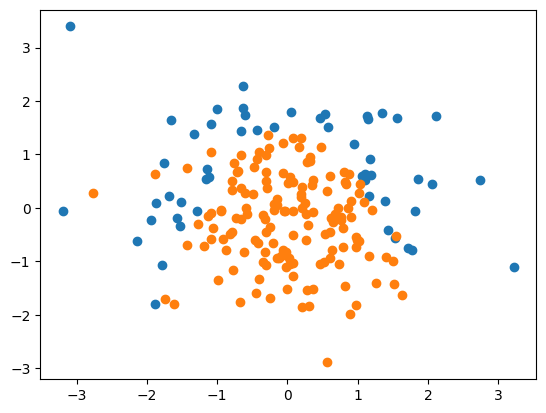

In [3]:
# 散點圖觀察
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [4]:
# 數據拆分
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)


In [5]:
# 使用邏輯回歸進行二分類
from sklearn.linear_model import LogisticRegression

log = LogisticRegression() # 邏輯回歸
log.fit(X_train, y_train) # 通過訓練樣本擬合

print(log.score(X_test, y_test))

0.86


In [12]:
# 調整邏輯回歸的概率閾值
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train, y_train)

# 預測出測試樣本中的概率
pred_proba = log.predict_proba(X_test) #第一個參數是y==0的概率，第二個是y==1的概率
# 獲取每個樣本被預測為y=1種類的概率
pred_proba_one = pred_proba[:,1]
threashold = 0.45 # 自己設定的概率閾值
pred_result = np.array(pred_proba_one > threashold, dtype=int)
# 判斷準確率
print(np.sum(pred_result == y_test)/len(y_test))

0.9
